In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [107]:
dataset = pd.read_csv(r"bengaluru_house_prices.csv")
dataset.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


C:\Users\HP\AppData\Local\Temp\ipykernel_3192\3460708318.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = dataset.corr(),annot=True)


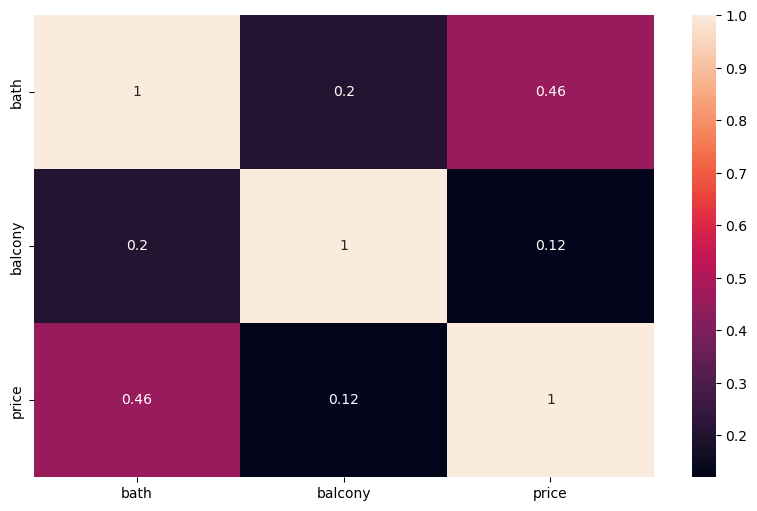

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(data = dataset.corr(),annot=True)
plt.show()

In [109]:
x = dataset.iloc[:,:-1]
y = dataset["total_sqft"]

In [110]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
print(x_train.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
dtype: object


In [119]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [121]:
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_3192\3817839515.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train = x_train.fillna(x_train.mean())
C:\Users\HP\AppData\Local\Temp\ipykernel_3192\3817839515.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_test = x_test.fillna(x_test.mean())


In [122]:
le = LabelEncoder()
x_train = le.fit_transform(x_train)
x_test = le.transform(x_test)


ValueError: y should be a 1d array, got an array of shape (10656, 8) instead.

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

In [ ]:
plt.bar(x.columns,lr.coef_)

In [ ]:
x.columns

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlable("columns")
plt.ylable("coef")
plt.show()

# Lasso

In [ ]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

In [ ]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlable("columns")
plt.ylable("coef")
plt.show()

# Ridge

In [ ]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

In [ ]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Lasso")
plt.xlable("columns")
plt.ylable("coef")
plt.show()

In [ ]:
df=pd.DataFrame({"col_name":x.column,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [ ]:
df

# Logistic Regression

In [ ]:
x = df[["bath"]]
y = df["balcony"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="bath",y = "bolcany",data=df)
plt.show()

In [ ]:
x = df[["bath"]]
y = df["bolcany"]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
lr.score(x_test,y_test)*100

In [ ]:
lr.predict([[40]])

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="bath",y = "bolcany",data=df)
sns.lineplot(x = "bath", y = lr.predict(x),data=df)
plt.show()